<a href="https://colab.research.google.com/github/eng-accelerator/Submissions-C4/blob/main/1st_Assignment_Gradio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

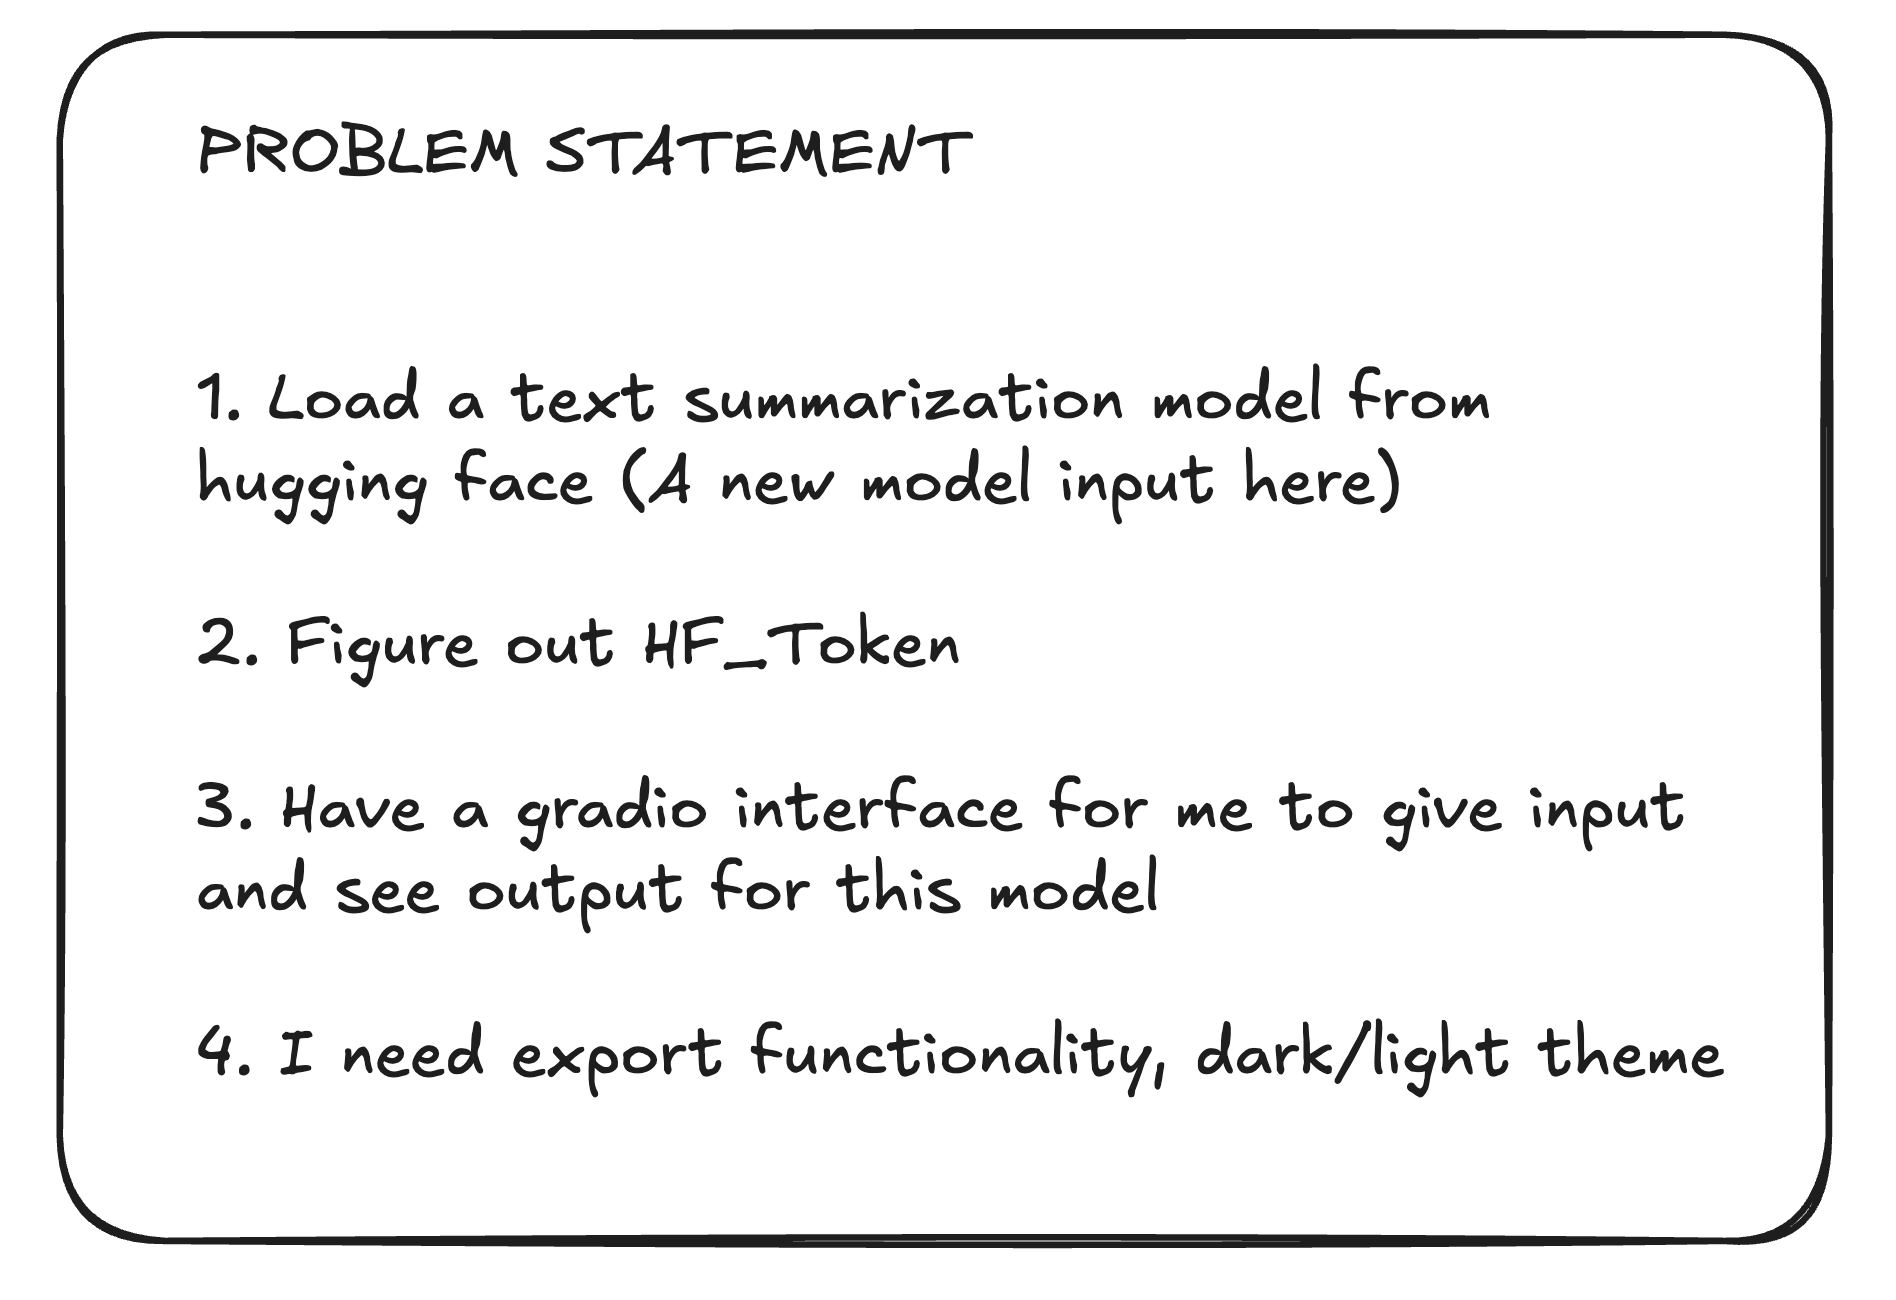

In [ ]:
!pip install huggingface_hub

from huggingface_hub import whoami
from google.colab import userdata

# Get your Hugging Face token from Colab Secrets
hf_token = userdata.get('HF_TOKEN')

# Verify the token by checking your identity
try:
    user_info = whoami(token=hf_token)
    print(f"Logged in as: {user_info['name']}")
except Exception as e:
    print(f"Could not log in: {e}")
    print("Please make sure you have added your Hugging Face token to Colab Secrets with the name 'HF_TOKEN'")

Logged in as: sweety791


##Showcasing Different Model Types


###Hugging Face isn't just about text! Let's explore how to use models for other modalities like images and audio, and also how to work with datasets.

Image Classification
Image classification is the task of categorizing an image into one of several classes. We can use a pre-trained image classification model from the Hugging Face Hub.

In [ ]:
from transformers import pipeline
from PIL import Image
import requests

# Load an image classification pipeline
classifier = pipeline("image-classification")

# Get an image from a URL (replace with your image URL)
url = "https://i.guim.co.uk/img/media/327aa3f0c3b8e40ab03b4ae80319064e401c6fbc/377_133_3542_2834/master/3542.jpg?width=1200&height=1200&quality=85&auto=format&fit=crop&s=34d32522f47e4a67286f9894fc81c863"
image = Image.open(requests.get(url, stream=True).raw)

# Classify the image
predictions = classifier(image)

print("Image Classification Results:")
for prediction in predictions:
    print(f"- {prediction['label']}: {prediction['score']:.2f}")

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326.
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/200 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


Image Classification Results:
- tiger cat: 0.78
- tabby, tabby cat: 0.17
- Egyptian cat: 0.04
- lynx, catamount: 0.00
- Persian cat: 0.00


### Audio Classification

Audio classification is the task of categorizing audio data into different classes, such as identifying the type of sound or the speaker's emotion.

In [ ]:
from transformers import pipeline
import torch
import soundfile as sf

# Load an audio classification pipeline
# We use a smaller model for demonstration purposes
classifier = pipeline("audio-classification", model="superb/wav2vec2-base-superb-ks")

# This is a simple sine wave, you would load your actual audio data
dummy_audio = torch.randn(16000) # 1 second of dummy audio at 16kHz
sf.write("dummy_audio.wav", dummy_audio.numpy(), 16000)


# Classify the audio
audio_file = "dummy_audio.wav"
predictions = classifier(audio_file)

print("Audio Classification Results:")
for prediction in predictions:
    print(f"- {prediction['label']}: {prediction['score']:.2f}")

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/378M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/216 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/215 [00:00<?, ?B/s]

Audio Classification Results:
- _silence_: 1.00
- _unknown_: 0.00
- stop: 0.00
- right: 0.00
- yes: 0.00
- down: 0.00
- left: 0.00
- off: 0.00
- up: 0.00
- no: 0.00
- go: 0.00
- on: 0.00


### Working with Datasets

Hugging Face provides the `datasets` library, which makes it easy to access and work with a wide variety of datasets for various ML tasks.

In [ ]:
from datasets import load_dataset

# Load a dataset (e.g., the SQuAD dataset for question answering)
dataset = load_dataset("squad")

# Print information about the dataset
print(dataset)

# Access an example from the training set
print("\nExample from the training set:")
print(dataset["train"][0])

README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

plain_text/validation-00000-of-00001.par(…):   0%|          | 0.00/1.82M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 87599
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 10570
    })
})

Example from the training set:
{'id': '5733be284776f41900661182', 'title': 'University_of_Notre_Dame', 'context': 'Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects thr

## Introduction to Gradio

Gradio is an open-source Python library that allows you to quickly create customizable UI components for our machine learning models. It's a great way to build interactive demos and share our models with others.

## Transcription with Hugging Face

Audio transcription is the task of converting spoken language into text. Hugging Face also offers models for this task.

Here's how we can use a pre-trained model for audio transcription:


In [ ]:
!pip install --upgrade transformers accelerate

from transformers import pipeline
import soundfile as sf
import torch

# Load the automatic speech recognition pipeline
transcriber = pipeline("automatic-speech-recognition", model="facebook/wav2vec2-base-960h")

# This is just for demonstration purposes. In a real scenario, you would load your audio file.
# audio_data = "/content/Durga Nagar Road 3.m4a" # Dummy data for 1 second of audio at 16kHz
# sf.write("/content/Durga Nagar Road 3.m4a", audio_data, 16000)

# Transcribe the audio
audio_file = "/content/dummy_audio.wav" # Using the dummy audio created previously
transcription = transcriber(audio_file)

print("Transcription:")
print(transcription['text'])

Loading weights:   0%|          | 0/212 [00:00<?, ?it/s]

Wav2Vec2ForCTC LOAD REPORT from: facebook/wav2vec2-base-960h
Key                        | Status  | 
---------------------------+---------+-
wav2vec2.masked_spec_embed | MISSING | 

Notes:
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.


Transcription:



In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Load a pre-trained summarization model and tokenizer
# Using 'facebook/bart-large-cnn' which is a well-known summarization model
tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-cnn")
model = AutoModelForSeq2SeqLM.from_pretrained("facebook/bart-large-cnn")

# Text to summarize
text = """
Hugging Face is a company and open-source platform that provides tools and models for natural language processing (NLP). It has become a central hub for the ML community, offering a wide range of pre-trained models that can be easily used or fine-tuned for specific applications. Key aspects of Hugging Face include the Transformers library, Model Hub, Datasets library, and Tokenizers library. Hugging Face democratizes access to powerful ML models, making it easier for developers and researchers to build and deploy applications.
"""

# Tokenize the input text
inputs = tokenizer(
    [text],
    max_length=1024, # Adjust max_length as needed
    truncation=True,
    return_tensors="pt"
)

# Generate the summary
# Common parameters for summarization: num_beams, early_stopping
summary_ids = model.generate(
    inputs["input_ids"],
    max_new_tokens=50, # Controls the maximum length of the summary
    min_length=25,    # Controls the minimum length of the summary
    do_sample=False,  # Set to True for more diverse summaries, False for deterministic
    # num_beams=4,      # For beam search
    # early_stopping=True
)

# Decode the generated summary
summary_text = tokenizer.decode(
    summary_ids[0],
    skip_special_tokens=True,
    clean_up_tokenization_spaces=True
)

print("Original Text:")
print(text)
print("\nSummary:")
print(summary_text)

Please make sure the generation config includes `forced_bos_token_id=0`. 


Loading weights:   0%|          | 0/511 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

Original Text:

Hugging Face is a company and open-source platform that provides tools and models for natural language processing (NLP). It has become a central hub for the ML community, offering a wide range of pre-trained models that can be easily used or fine-tuned for specific applications. Key aspects of Hugging Face include the Transformers library, Model Hub, Datasets library, and Tokenizers library. Hugging Face democratizes access to powerful ML models, making it easier for developers and researchers to build and deploy applications.


Summary:
Hugging Face is a company and open-source platform that provides tools and models for natural language processing. It has become a central hub for the ML community, offering a wide range of pre-trained models.


SAMPLE SUMMARISATION CODE

ASSIGNMENT GOES BELOW -

In [ ]:
import gradio as gr
import tempfile
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# -----------------------------
# Load model
# -----------------------------
tokenizer = AutoTokenizer.from_pretrained(
    "suriya7/bart-finetuned-text-summarization"
)
model = AutoModelForSeq2SeqLM.from_pretrained(
    "suriya7/bart-finetuned-text-summarization"
)

# -----------------------------
# Summarization function
# -----------------------------
def generate_summary(text):
    inputs = tokenizer(
        [text],
        max_length=1024,
        truncation=True,
        return_tensors="pt"
    )

    summary_ids = model.generate(
        inputs["input_ids"],
        max_new_tokens=100,
        do_sample=False
    )

    return tokenizer.decode(
        summary_ids[0],
        skip_special_tokens=True
    )

# -----------------------------
# Export function
# -----------------------------
def export_summary(summary):
    file = tempfile.NamedTemporaryFile(
        delete=False,
        suffix=".txt",
        mode="w",
        encoding="utf-8"
    )
    file.write(summary)
    file.close()
    return file.name

# -----------------------------
# Simple Blocks UI
# -----------------------------
with gr.Blocks() as demo:
    gr.Markdown("## Text Summarizer")

    input_text = gr.Textbox(
        lines=8,
        label="Input Text",
        placeholder="Paste text to summarize..."
    )

    summarize_btn = gr.Button("Summarize")

    summary_output = gr.Textbox(
        lines=5,
        label="Summary"
    )

    export_btn = gr.Button("Export Summary")
    file_output = gr.File(label="Download Summary (.txt)")

    summarize_btn.click(
        fn=generate_summary,
        inputs=input_text,
        outputs=summary_output
    )

    export_btn.click(
        fn=export_summary,
        inputs=summary_output,
        outputs=file_output
    )

demo.launch()

config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/279 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Please make sure the generation config includes `forced_bos_token_id=0`. 


Loading weights:   0%|          | 0/512 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/358 [00:00<?, ?B/s]

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fa0578a0cf79a50ea0.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
